In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'/home/aw1223/ip/worktree_a')
sys.path.insert(0,'/home/aw1223/ip/worktree_a/imports/neural-lam')
sys.path.insert(0,'/home/aw1223/ip/worktree_a/imports/mase')

from sdk.ample import Ample

from sdk.graphs.random_graph import RandomGraph
#TODO change to just models in file sturcture
from sdk.models.models import GCN_Model, GAT_Model, GraphSAGE_Model, GIN_Model, GCN_MLP_Model, MLP_Model, Edge_Embedding_Model, Interaction_Net_Model
from sdk.graph_tracer import GraphTracer


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#Import neural lam
ample = Ample()
edge = True
#TODO fix this : If model does not use edges, dont set edges to be true - will brrak things 
graph = RandomGraph(num_nodes=10, avg_degree=1, num_channels=32, graph_precision="FLOAT_32",edge_dim=32,edges = edge) #TODO add var

Neural LAM Args Namespace(dataset='meps_example', model='graph_lam', subset_ds=0, seed=42, n_workers=1, epochs=1, batch_size=1, load=None, restore_opt=0, precision=32, graph='1level', hidden_dim=64, hidden_layers=1, processor_layers=1, mesh_aggr='sum', output_std=0, ar_steps=1, control_only=0, loss='wmse', step_length=1, lr=0.001, val_interval=1, eval='test', n_example_pred=1)
/home/aw1223/ip/worktree_a/imports/neural-lam
Loaded graph with 70345 nodes (63784 grid, 6561 mesh)
Edges in subgraphs: m2m=51520, g2m=100656, m2g=255136
tensor([[ 6561,  6562,  6563,  ..., 70342, 70343, 70344],
        [    0,     0,     0,  ...,  6560,  6560,  6560]])
Moving model to Ample
Compiling model
name grid_features_expander
['grid_features_expander_input_0']
['grid_features_expander_output_0']
[0, 1]
ExpandToBatch
name grid_embedder
['grid_embedder_input_0']
['grid_embedder_output_0']
[10, 11]
Sequential
name g2m_embedder
['g2m_embedder_input_0']
['g2m_embedder_output_0']
[20, 21]
Sequential
name m2g_e

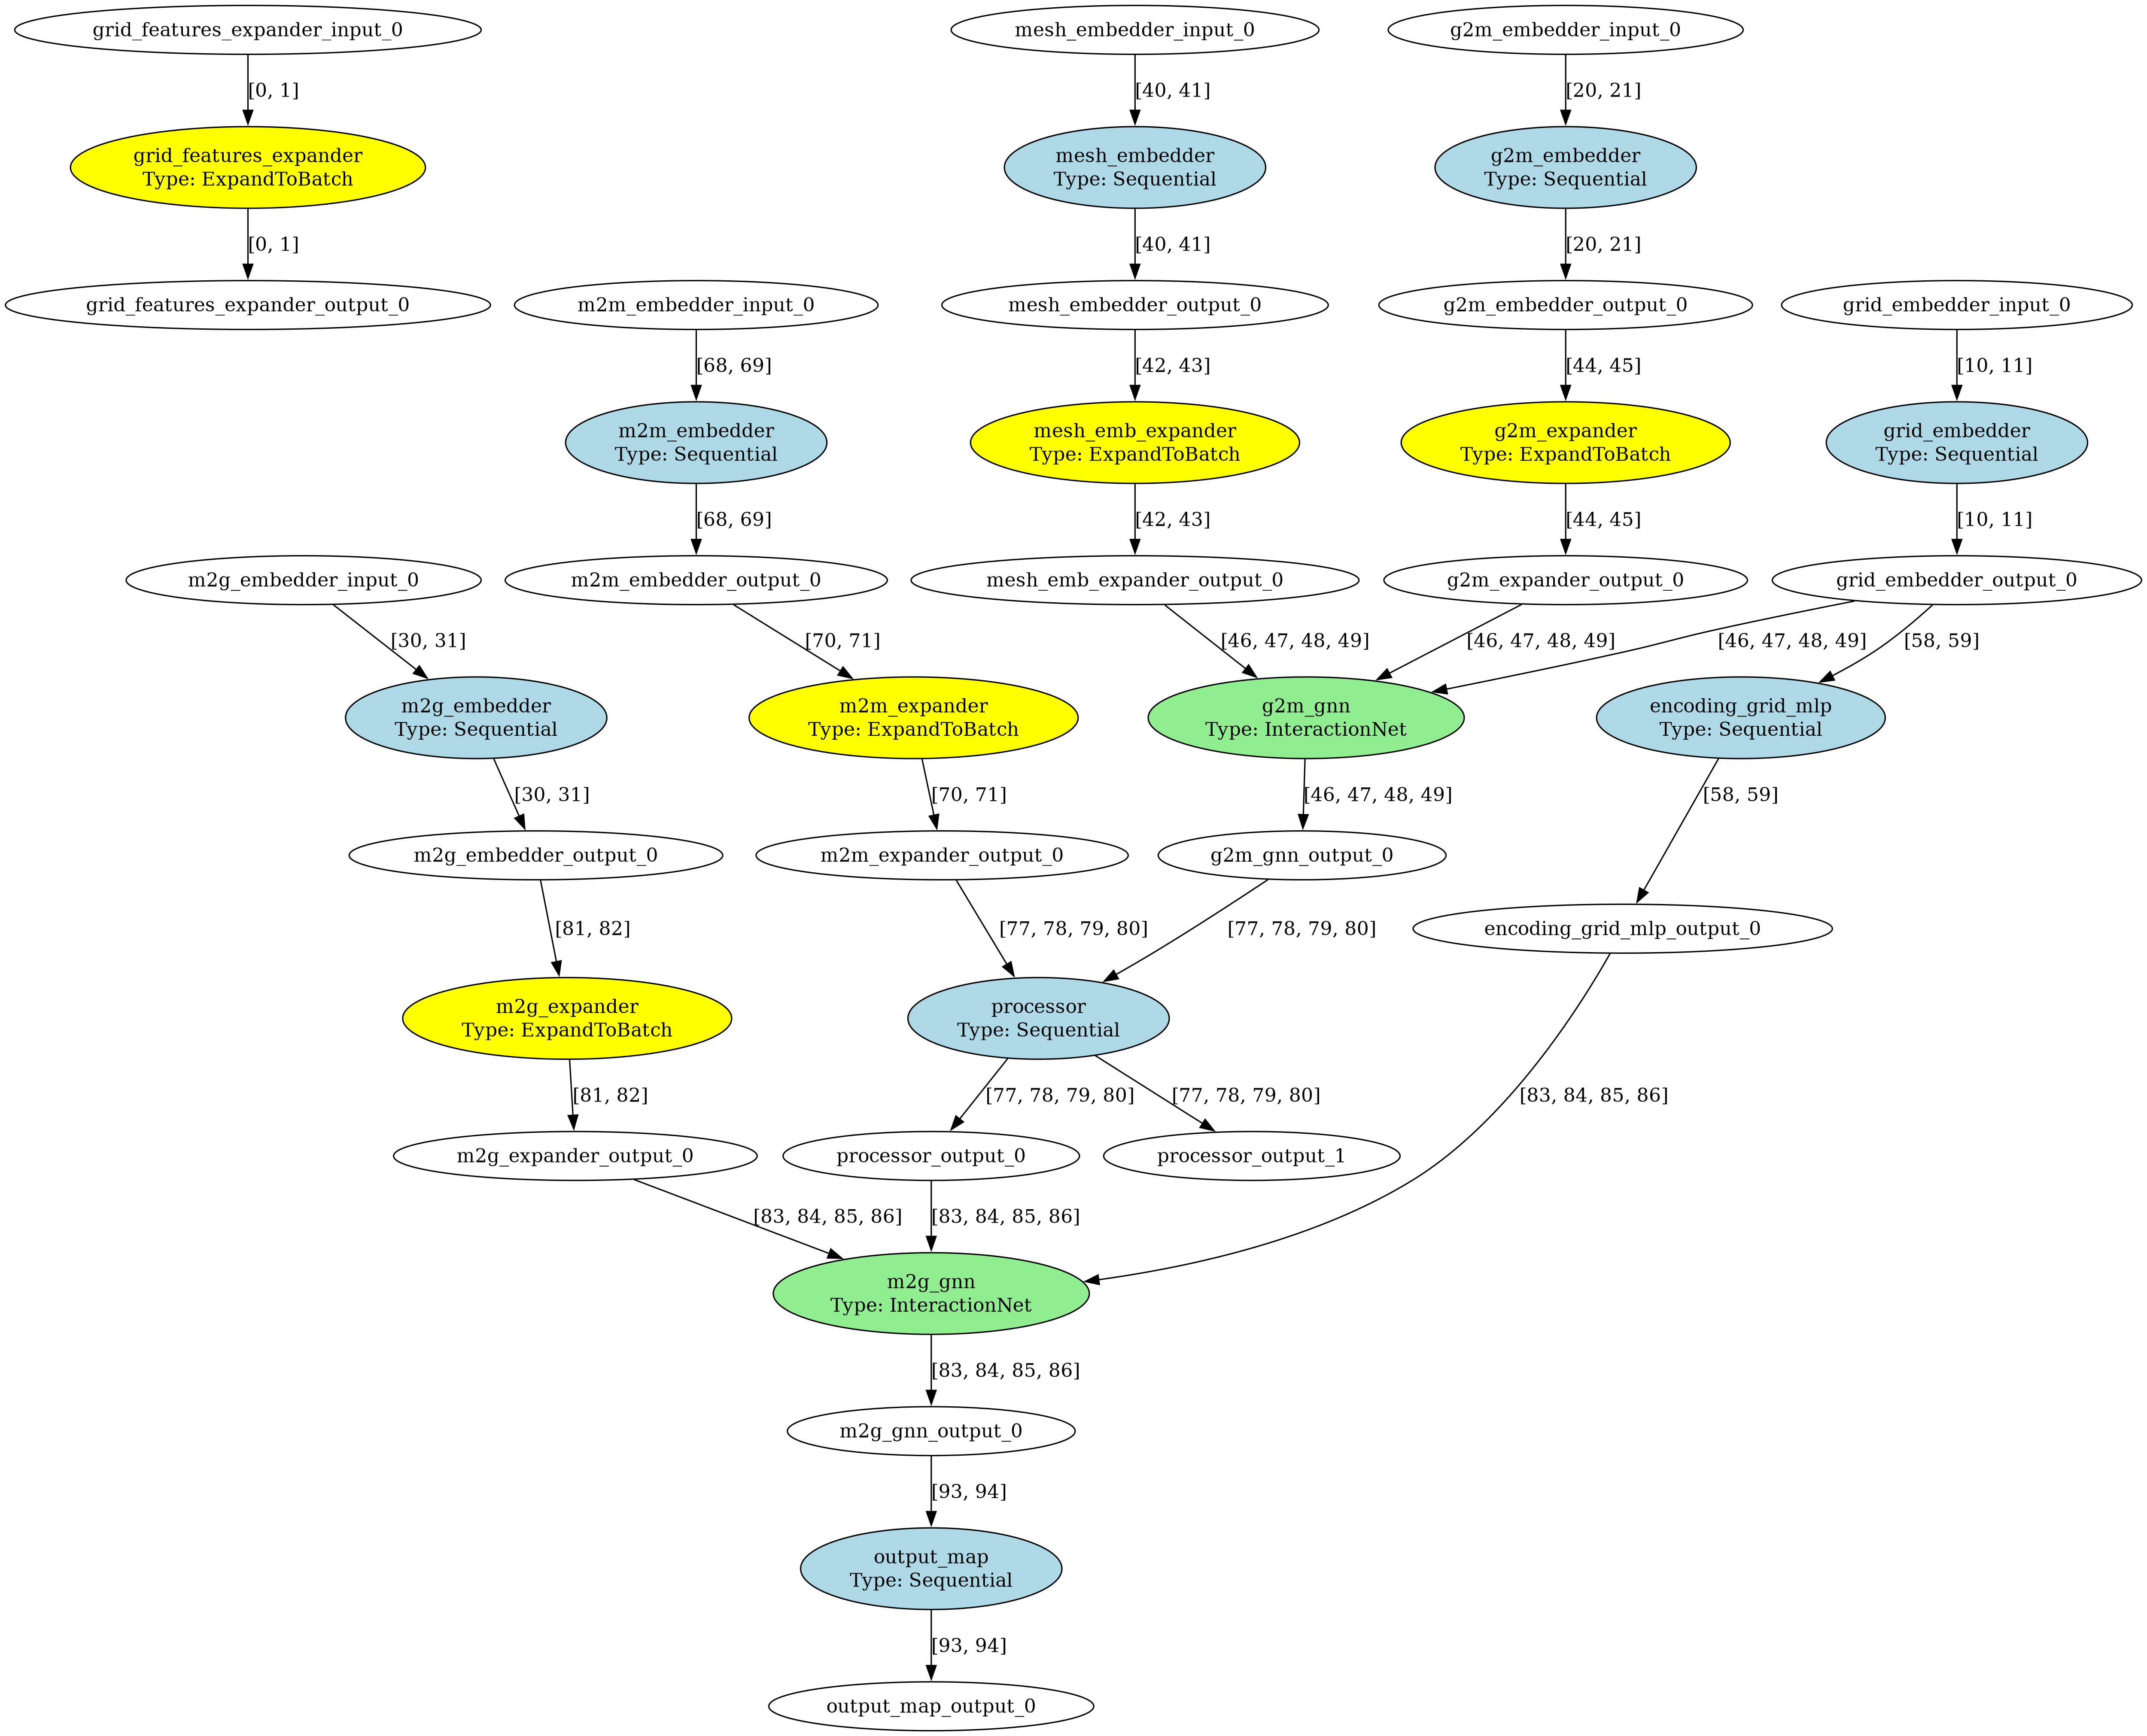

In [12]:
#Trace model, find the constituent models e.g GCN, Interaction net and create a data flow graph

import sys

import torch

from neural_lam.models.graph_lam import GraphLAM
from neural_lam.weather_dataset import WeatherDataset
from neural_lam.utils import make_mlp

from neural_lam.interaction_net import InteractionNet

import argparse
# Manually create the args Namespace object with the desired parameters
args = argparse.Namespace(
    dataset='meps_example',
    model='graph_lam',
    subset_ds=0,
    seed=42,
    n_workers=1,
    epochs=1,
    batch_size=1,
    load=None,
    restore_opt=0,
    precision=32,
    graph='1level',
    hidden_dim=64,
    hidden_layers=1,
    processor_layers=1,
    mesh_aggr='sum',
    output_std=0,
    ar_steps=1,
    control_only=0,
    loss='wmse',
    step_length=1,
    lr=0.001,
    val_interval=1,
    eval='test',
    n_example_pred=1
)
print('Neural LAM Args', args)
#Change to neural-lam directory
%cd /home/aw1223/ip/worktree_a/imports/neural-lam

eval_loader = torch.utils.data.DataLoader(
                WeatherDataset(
                    args.dataset,
                    pred_length=1,
                    split="test",
                    subsample_step=args.step_length,
                    subset=bool(args.subset_ds),
                ),
                args.batch_size,
                shuffle=False,
                num_workers=args.n_workers,
            )


model = GraphLAM(args)



# %cd -

ample = Ample()

edge_index_path = '/home/aw1223/ip/worktree_a/imports/neural-lam/graphs/1level/g2m_edge_index.pt'
edge_index = torch.load(edge_index_path)
print(edge_index)
# Print the edge_index to inspect it
# model = InteractionNet(
#         edge_index,
#         input_dim=64,
#         update_edges=False,
#         hidden_layers=1,
#         hidden_dim=None,
#         edge_chunk_sizes=None,
#         aggr_chunk_sizes=None,
#         aggr="sum",
#     )

# model = MLP_Model()
sys.path.insert(0,'/home/aw1223/ip/worktree_a/imports/mase')
import sys
import traceback
import inspect


model.to_device('ample',data_loader=eval_loader)

#Send data before to load device
#graph.todevice('ample')



In [ ]:
%cd /home/aw1223/ip/worktree_a/imports/neural-lam
ample.compile(model, eval_loader=eval_loader, trace_mode = 'hooks')


In [ ]:
# ample.to_device()

In [ ]:
# import pytorch_lightning as pl
# trainer = pl.Trainer(
#       max_epochs=args.epochs,
#       deterministic=True,
#       strategy="ddp_notebook",
#       # accelerator=device_name,
#       # logger=logger,
#       log_every_n_steps=1,
#       # callbacks=[checkpoint_callback],
#       check_val_every_n_epoch=args.val_interval,
#       precision=args.precision,
#   )



# trainer.test(model=model, dataloaders=eval_loader)


In [ ]:
#Use initalize to construct memory map for each model and then string together the dataflow between models

In [ ]:
#Program Agile using device